# Monty Hall Problem: Sometimes probability is NOT as easy as you think


Back in the 1990s, in a popular American game show _Let's Make a Deal_, host Monty Hall would give contestants three doors to choose from. Behind one of those doors was a brand new sports car, and the other two were goats. You would win whatever you got from the door you chose from. For the sake of the problem, we assume that you would want a sports car rather than a goat. Once you choose a door, Monty opens one of the two other doors that has a goat behind it. Since he setup the game he will always pick and open a door with a goat. You now have a chance to switch your choice of door. What should you do?



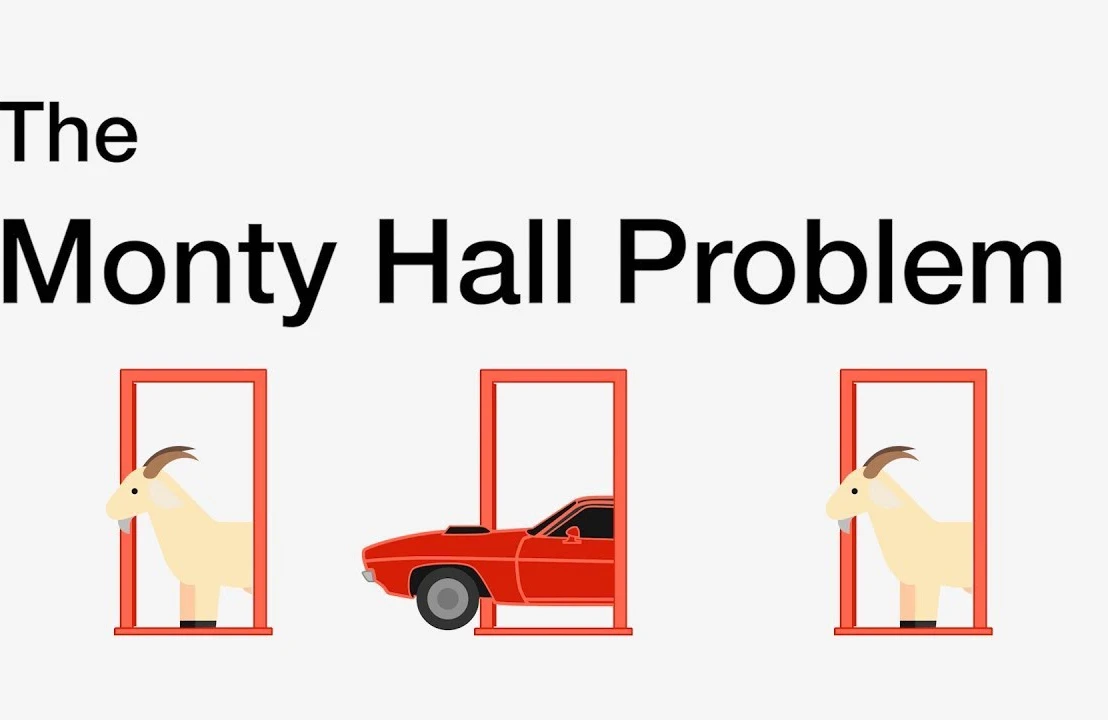


Before Monty reveals the door with a goat inside, the chance of you selecting the door with the car inside on your first selection is: $$\frac{1}{3}$$ because we assume that the door with the car is chosen randomly with equal probability.


We can model the probability and follows. Label the door you chose as 1 and the other doors and door 2 and 3. Let $C_i$ be the event that the car lies behind door $i$ and let $G_m$ be the event that a goat is revealed behind door $m$, where $m$ is the number of the door where the goat was revealed.

Then, by Baye's Rule, if we want to calculate $P(C_1|G_m)$ (the probability we win the car after revealing: 

$$P(C_1|G_m) = \frac{P(G_m|C_1)P(C_1)}{P(G_m|C_1)P(C_1) + P(G_m|C_2)P(C_2) + P(G_m|C_3)P(C_3)}$$


To solve this problem, without loss of generality, assume that Monty opens door 2, meaning that $P(G_m|C_2) = 0$ because we know that there is already a goat behind it. Then, $P(G_2|C_1) = 1/2$ because the host chooses uniformly and at random *doors with goats behind them that are not door one*. Specifically, if the car is behind door one, there are two other doors that have goats in them. $P(G_2|C_3) = 1$ because if the car is in door 3 then there is only one door that has a goat behind it that isn't door 1. Plugging these numbers in we then get $P(C_1|G_2) = 1/3$ which then means that $P(C_3|G_2) = 2/3$.

In other words, if we were to repeat this experiment over multiple trials, the optimal decision would be to **ALWAYS** switch what door you choose because then you would have a 2/3 probability of winning.



To explain it more inuitively and visually, using these images I stole from this numberphile video:(https://www.youtube.com/watch?v=4Lb-6rxZxx0)

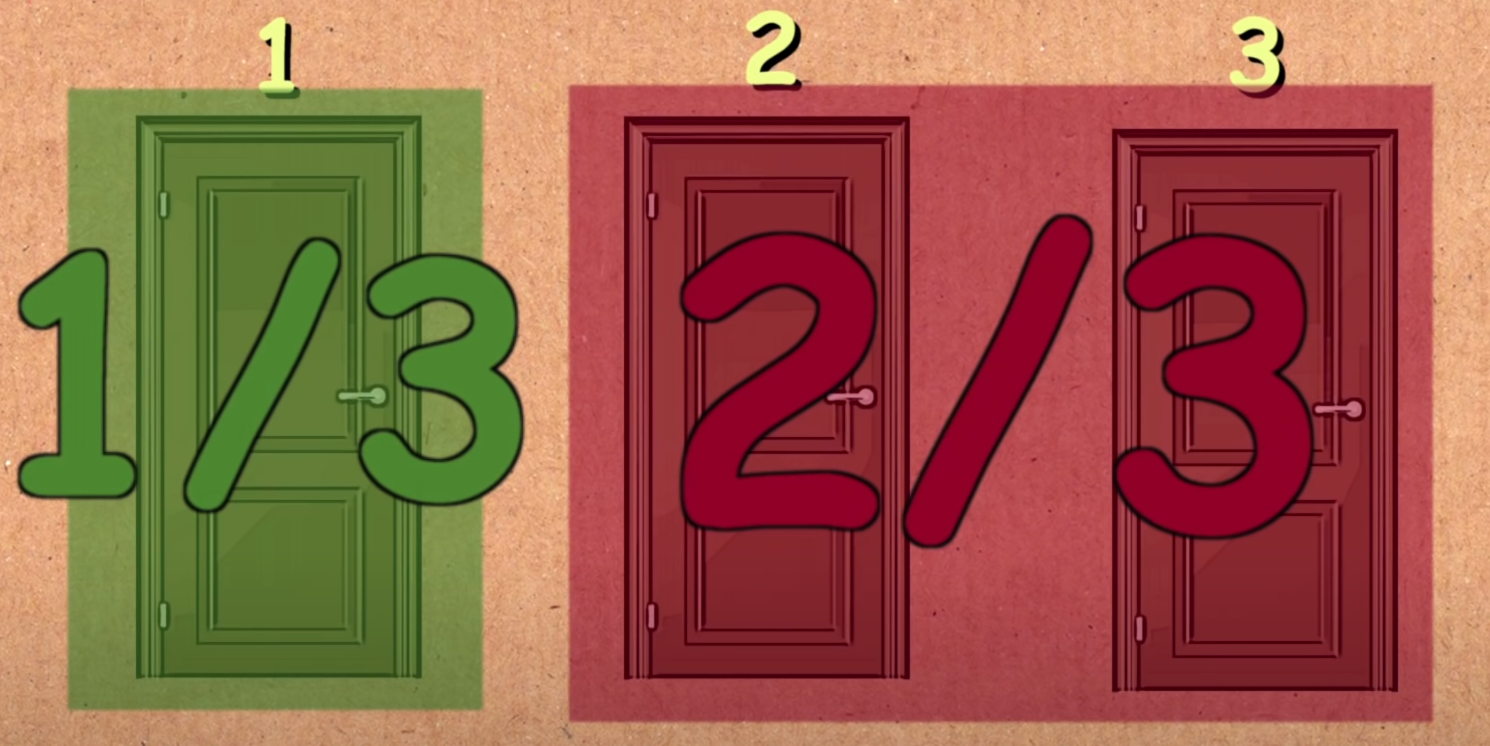


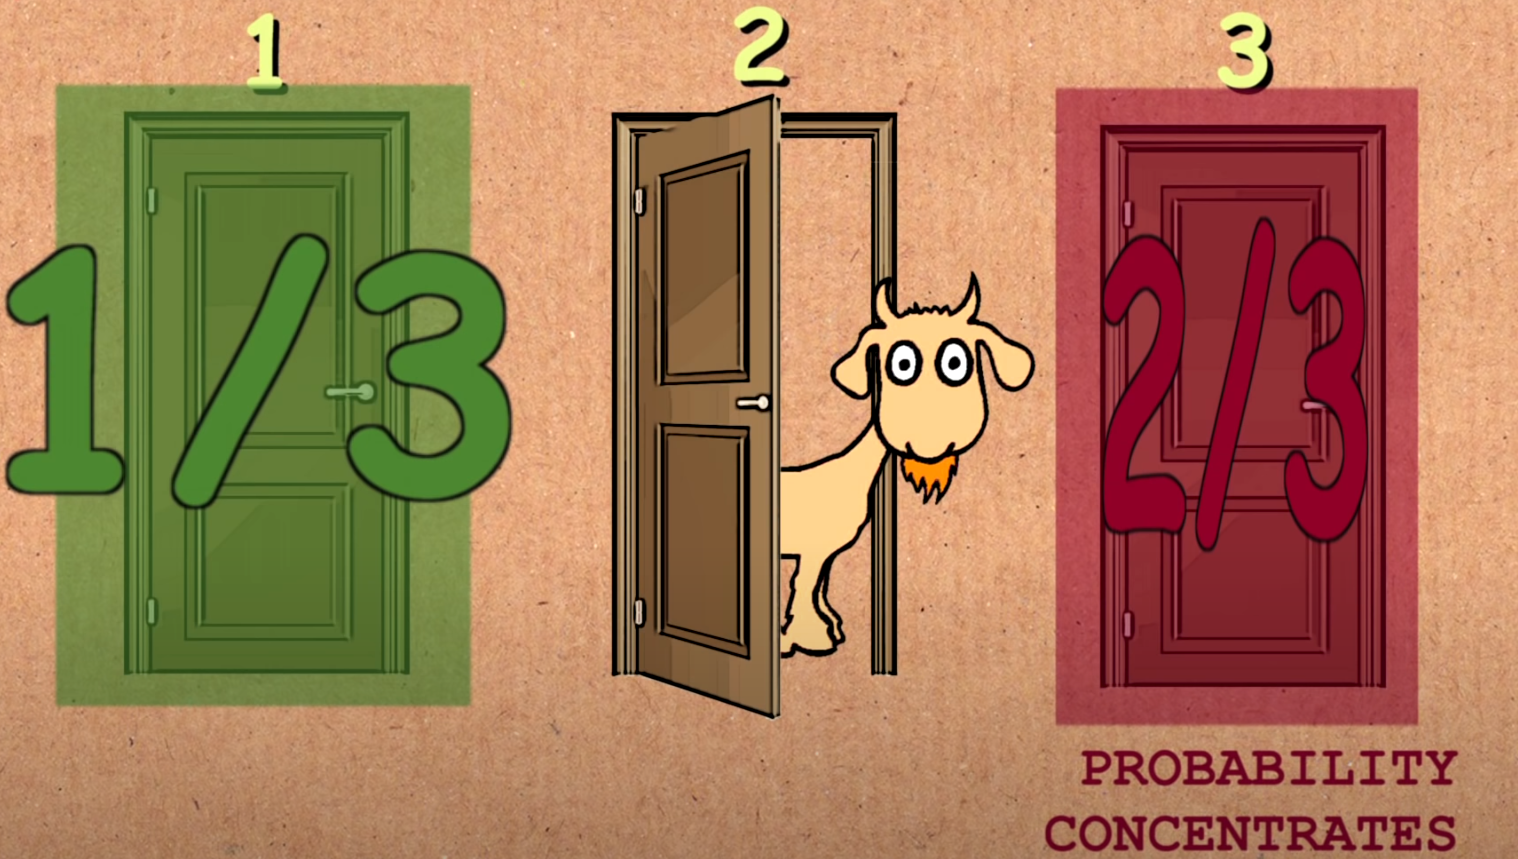

In [1]:
# Code borrowed from: https://scipython.com/book/chapter-4-the-core-python-language-ii/examples/the-monty-hall-problem/

import random

def run_trial(switch_doors, ndoors=3):
    """
    Run a single trial of the Monty Hall problem, with or without switching
    after the gameshow host reveals a goat behind one of the unchosen doors.
    (switch_doors is True or False). The car is behind door number 1 and the
    gameshow host knows that.

    """

    # Pick a random door out of the ndoors available
    chosen_door = random.randint(1, ndoors)
    if switch_doors:
        # Reveal a goat
        revealed_door = 3 if chosen_door==2 else 2
        # Make the switch by choosing any other door than the initially-
        # selected one and the one just opened to reveal a goat. 
        available_doors = [dnum for dnum in range(1,ndoors+1)
                                if dnum not in (chosen_door, revealed_door)]
        chosen_door = random.choice(available_doors)

    # You win if you picked door number 1
    return chosen_door == 1

def run_trials(ntrials, switch_doors, ndoors=3):
    """
    Run ntrials iterations of the Monty Hall problem with ndoors doors, with
    and without switching (switch_doors = True or False). Returns the number
    of trials which resulted in winning the car by picking door number 1.

    """

    nwins = 0
    for i in range(ntrials):
        if run_trial(switch_doors, ndoors):
            nwins += 1
    return nwins

ndoors, ntrials = 3, 10000
nwins_without_switch = run_trials(ntrials, False, ndoors)
nwins_with_switch = run_trials(ntrials, True, ndoors)

print('Monty Hall Problem with {} doors'.format(ndoors))
print('Proportion of wins without switching: {:.4f}'
            .format(nwins_without_switch/ntrials))
print('Proportion of wins with switching: {:.4f}'
            .format(nwins_with_switch/ntrials))

Monty Hall Problem with 3 doors
Proportion of wins without switching: 0.3286
Proportion of wins with switching: 0.6706
